In [1]:
import os
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import scipy
from scipy import linalg
from scipy.io import loadmat
from sklearn import mixture

from gmm_lbd.gmm import LbdGMM
from gmm_lbd.data_manager import GmmManager, plot_2D_mean_covars
from gmm_lbd.operations import prod, seq

%matplotlib inline



In [2]:
# datas taken from calinon matlab code GMM-GMR-v2 
data1 = loadmat('records/data1.mat')['Data'].transpose( )
print data1.shape
data2_a = loadmat('records/data2_a.mat')['Data'].transpose()
print data2_a.shape
data2_b = loadmat('records/data2_b.mat')['queryData'].transpose()
print data2_b.shape
data3_a = loadmat('records/data3_a.mat')['Data1'].transpose()
print data3_a.shape
data3_b = loadmat('records/data3_b.mat')['Data2'].transpose()
print data3_b.shape

(300, 3)
(300, 4)
(100, 2)
(300, 3)
(300, 3)


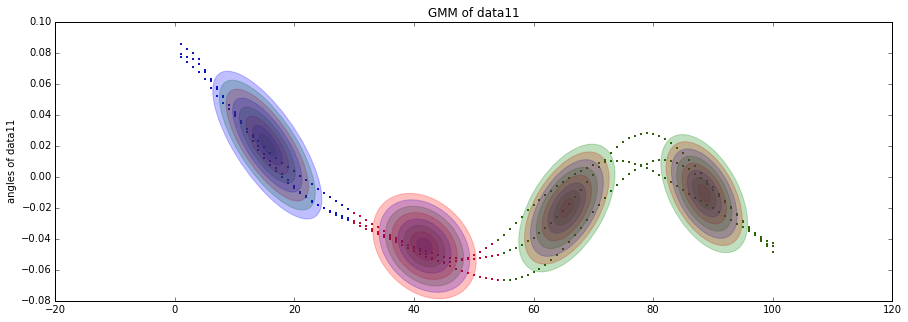

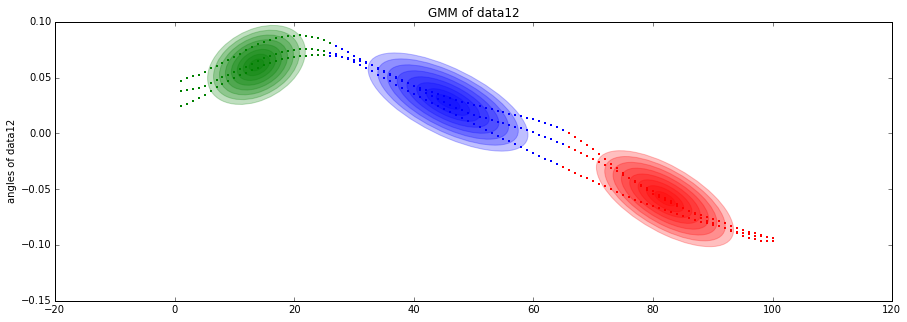

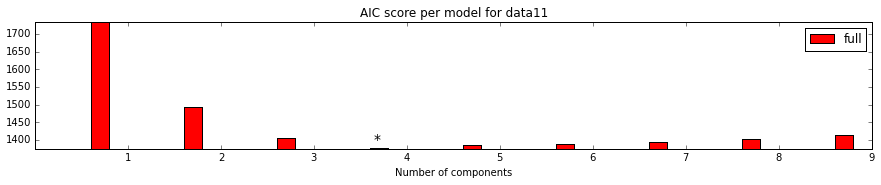

In [3]:
manager = GmmManager(n_components_range=range(1,10))
manager.add_dataset(data1[:,[0,1]],name='data11')
#manager.add_dataset(data1,name='data11')

manager.add_dataset(data1[:,[0,2]],name='data12')

manager.plot_ellipses_and_samples('data11')

manager.plot_ellipses_and_samples('data12')
manager.plot_bics('data11')


## Example of regression and combinaison of constraints

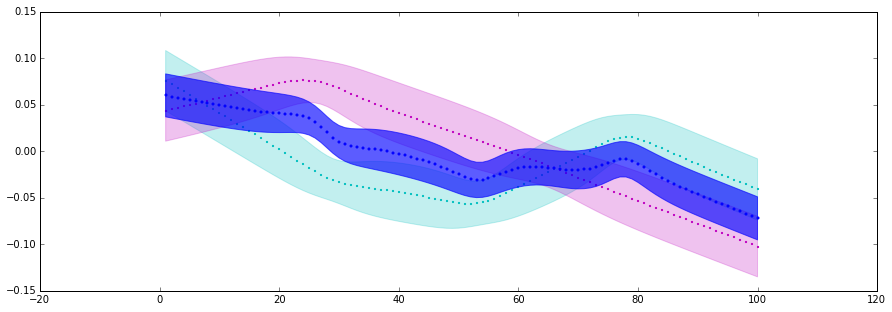

In [5]:
X = manager.datasets['data11']
gmm1, gmm2 = manager.gmms['data11'], manager.gmms['data12']
x = np.linspace(min(X[:,0]), max(X[:,0]), 100)

plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
plot_2D_mean_covars(x, gmm1.regression(x), ax=ax, color='c', size= 0.3)
plot_2D_mean_covars(x, gmm2.regression(x), ax=ax, color='m', size= 0.3)
plot_2D_mean_covars(x, prod(x, gmm1, gmm2), ax=ax, size=0.8)


## Example of concatenation

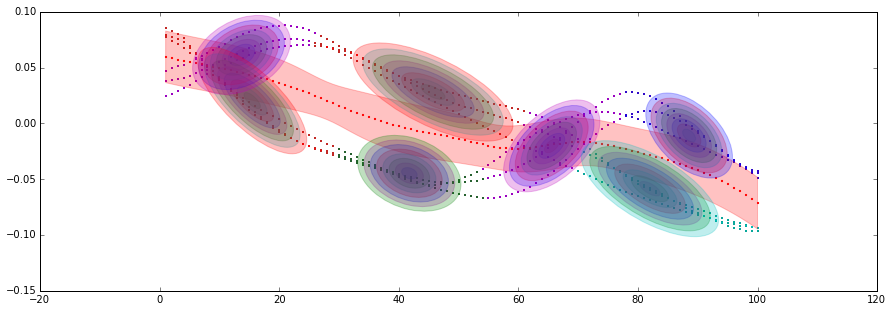

In [16]:
delta = max(gmm1.X_[:, 0]) - max(gmm2.X_[:, 0])
gmm2.X_[:, 0] += delta
gmm2.means_[:, 0] += delta


gmm3 = seq(gmm1,gmm2)
ax = gmm3.plot_ellipses(gmm3.X_)
plot_2D_mean_covars(x, gmm3.regression(x),ax=ax, color='r', size= 0.3)


In [10]:
temporal='add'
temporal == 'add'

True

In [ ]:
manager.add_dataset(data3_a[:,[0,1]],name='data3a')
manager.add_dataset(data3_b[:,[0,1]],name='data3b')
manager.plot_bics('data3a')
manager.plot_ellipses_and_samples('data3a')



In [ ]:
manager.plot_bics('data3b')
manager.plot_ellipses_and_samples('data3b')
manager.plot_regression('data3b')



In [ ]:
gmm1.means_[:,0]

In [ ]:
np.concatenate((gmm1.weights_ / 2, gmm2.weights_ / 2))

In [ ]:
gmm1._set_covars(gmm1.covars_)

In [ ]:
gmm1.covars_

In [ ]:
gmm1.covars_ /= 2
gmm1.plot_ellipses(gmm1.X)
plot_2D_mean_covars(x, gmm1.regression(x))


In [ ]:
try:
    x = x[:, 0]
except IndexError:
    pass
x.shape

In [ ]:
z.shape[0]